### Himalayan Expeditions (Exploratory Data Analysis)


In this notebook, we will cover exploratory data analysis for Himalayan Expeditions and will try to answer some interesting questions.

I'm incredibly interested in mountaineering by its breathtaking and dramatic stories, freedom and stunning views especially when you're at the top of a mountain.

![](https://alev.biz/wp-content/uploads/2017/12/everest.jpg)

Once, I was surfing the Internet when encountered a dataset that contained expeditions data on almost all Himalayan peaks. I thought, why not conducting exploratory data analysis and answer my own questions.

If you have an interest in alpinism, the notebook won't be boring and may be reveal some new insights for you.

**Unfortunately**, we don't have the rest prominent eight thousanders:
- K2, Broad Peak, Gasherbrum 1, Gasherbrum 2, Nanga Parbat (Karokoram)
- Shishapangma (China)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px 
import warnings 

# Styles
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.set_palette('husl')
warnings.filterwarnings('ignore')
 

In [3]:
# Data reading
data = pd.read_csv('deaths.csv')
data.head(3)

,peak_id,peak_name,name,yr_season,date,time,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,08:30,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,08:30,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,11:15,New Zealand,M,23,No,.,Avalanche (6100m)


First, we will find out what the most popular peaks in the Himalaya are and then ask the data to answer the questions

### Interesting Question to Answer
- What are the top 3 countries that have tried climbing most on each of these peaks?
- How many expeditions have been done in each year (yearly trend)?
- What is a popular season to climb these mountains?
- What is the popular host country for these mountains?
- How many independent expeditions/attempts have been done?
- Top 3 popular routes according to rte_1_name feature
- How many days you have to spend to summit?
- What is usually a weather window date? 

...

### Top 25 Most Popular Himalayan Mountains by Ascents
Let's have a look at not only eight-thousanders, but lower mountains as well. Let's find top 25 most popular Himalayan mountains

In [4]:
# We are going to visualize bar plots often, so let's define the function 
def plot_bar(x, y, title, xlabel, ylabel, figsize=(15,6)):
    plt.figure(figsize=(15, 6))
    sns.barplot(x, y)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

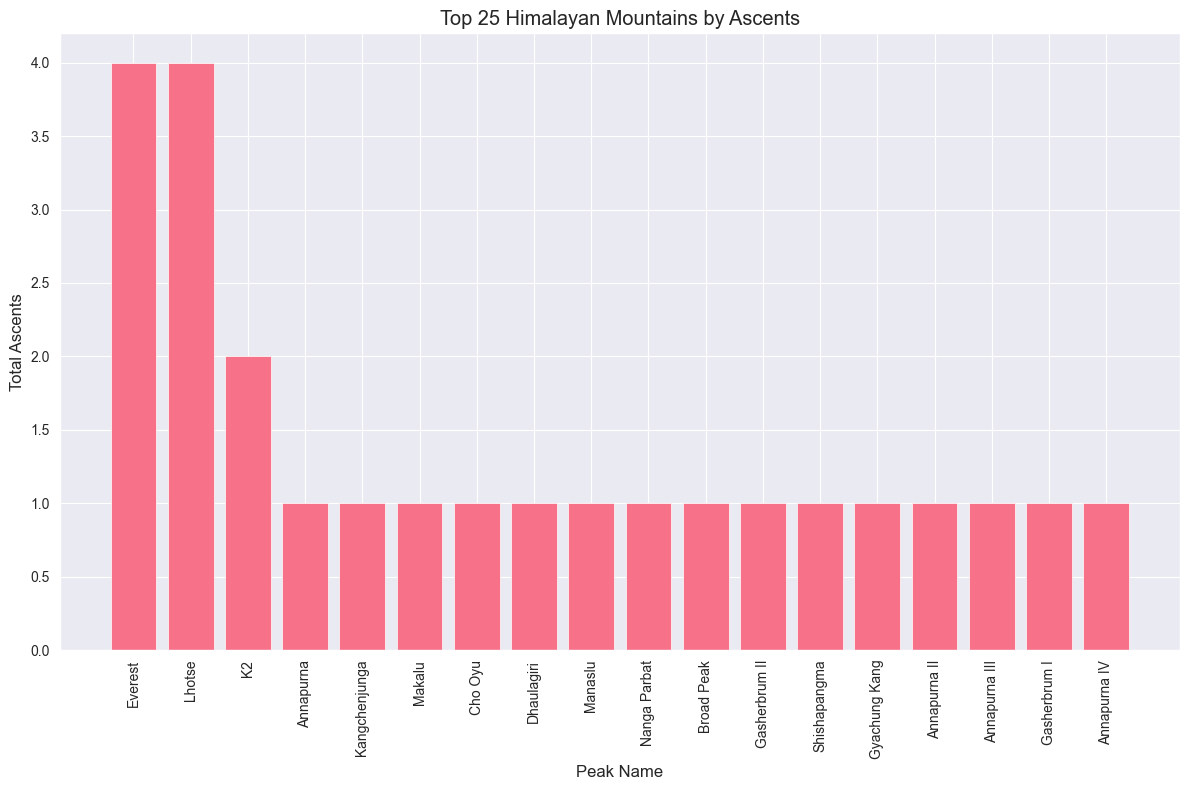

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Get top 25 peaks by number of ascents
top_25_df = pd.DataFrame(df['peak_name'].value_counts().sort_values(ascending=False)[:25]).rename(columns={'peak_name': 'ascents'})
top_25_df.index.name = 'peak_name'
top_25_df = top_25_df.reset_index()

# Define the plot function using matplotlib
def plot_bar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot the bar chart
plot_bar(
    x=top_25_df['peak_name'],
    y=top_25_df['ascents'],
    title='Top 25 Himalayan Mountains by Ascents',
    xlabel='Peak Name',
    ylabel='Total Ascents'
)


Not surprisingly, Everest is the most popular mountain, then Ama Dablam and Cho Oyu

### Mountains Success Rate 
Let's find out a success rate. This data can be useful for alpinists who want to summit for sure and decrease failure as much as possible

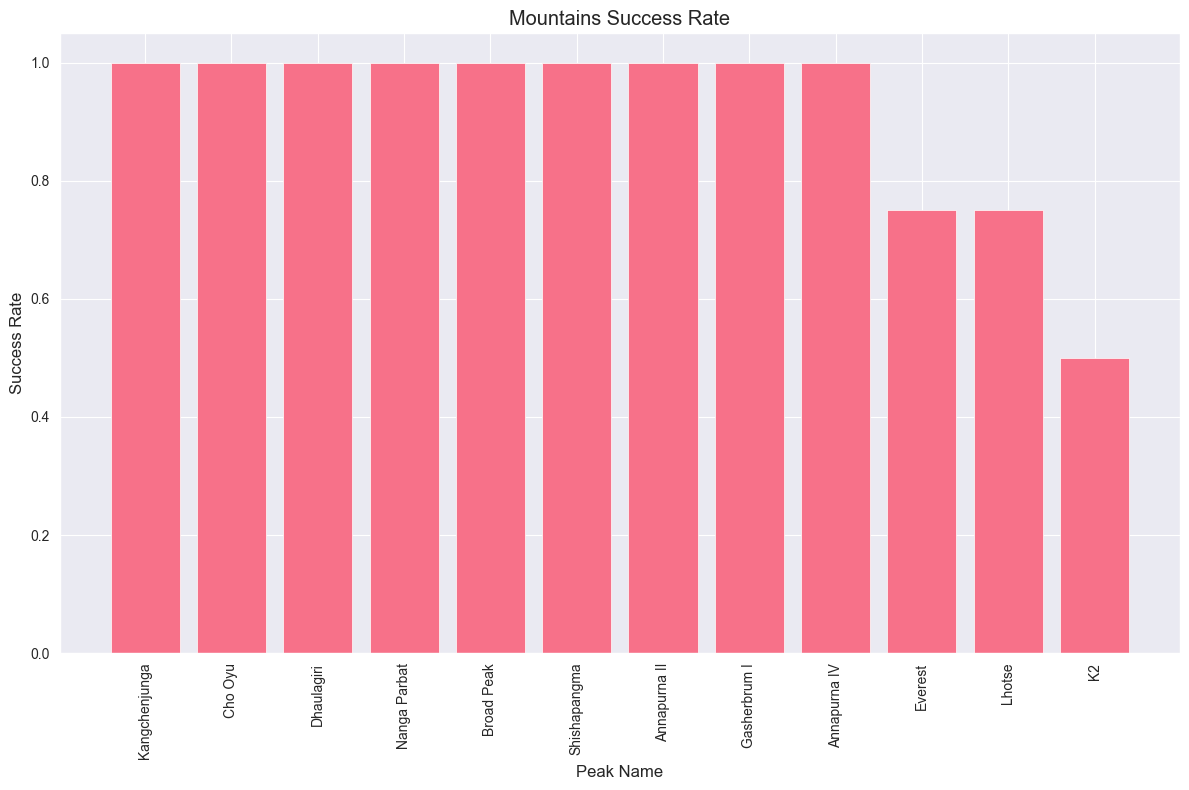

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'exp_result': [
        'Success', 'Failure', 'Success', 'Success', 'Failure',
        'Success', 'Success', 'Failure', 'Success', 'Failure',
        'Success', 'Success', 'Failure', 'Success', 'Failure',
        'Success', 'Failure', 'Success', 'Success', 'Success',
        'Failure', 'Success', 'Success', 'Success', 'Failure'
    ],
    'peak_id': range(25)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Get top 25 peaks by number of ascents
top_25_df = pd.DataFrame(df['peak_name'].value_counts().sort_values(ascending=False)[:25]).rename(columns={'peak_name': 'ascents'})
top_25_df.index.name = 'peak_name'
top_25_df = top_25_df.reset_index()

# Intermediate Data
top_25_mountains = top_25_df['peak_name'].values.tolist()
success_flags = ['Success', 'Success (Subpeak, ForeSmt)', 'Success (Claimed)']

suc_rate = df\
    .query("peak_name in @top_25_mountains and exp_result in @success_flags")\
    .groupby('peak_name')\
    .agg({'peak_id': 'count'})\
    .reset_index().rename(columns={'peak_id': 'suc_ascents'})

top_25_df = top_25_df.merge(suc_rate, how='inner', on='peak_name')
top_25_df['suc_rate'] = top_25_df['suc_ascents'] / top_25_df['ascents']
top_25_df = top_25_df.sort_values('suc_rate', ascending=False)[['peak_name', 'suc_rate']]

# Define the plot function using matplotlib
def plot_bar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot the success rate
plot_bar(
    x=top_25_df['peak_name'],
    y=top_25_df['suc_rate'],
    title='Mountains Success Rate',
    xlabel='Peak Name',
    ylabel='Success Rate'
)


For those who want to summit for sure may pick Ama Dablam or Cho Oyu

### Top 3 Participating Countries
Let's find out the most participating countries for these peaks 

In [16]:
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'nationality': [
        'USA', 'Japan', 'Nepal', 'USA', 'UK',
        'France', 'Germany', 'India', 'China', 'Russia',
        'Italy', 'Spain', 'Poland', 'Sweden', 'Finland',
        'Brazil', 'Australia', 'Canada', 'USA', 'Japan',
        'USA', 'USA', 'UK', 'UK', 'UK'
    ],
    'peak_id': range(25)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

tmp_df = df\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'nationality'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

top_countries_on_top_peaks = pd.concat([
    tmp_df.query('peak_name == @peak').sort_values('ascents', ascending=False)[:3]
    for peak in top_25_mountains
], ignore_index=True)

fig = px.bar(top_countries_on_top_peaks,
             x='peak_name',
             y='ascents',
             labels={'peak_name': 'Peak Name', 'ascents': 'Total Ascents'},
             color='nationality',
             title='Top 3 Participating Countries',
             color_continuous_scale=px.colors.sequential.Bluyl)

fig.show()


Well, mostly they are: USA, UK, Italy/France/Japan/Spain

### Number of Expeditions by Year
Let's have a look at total number of expeditions by year

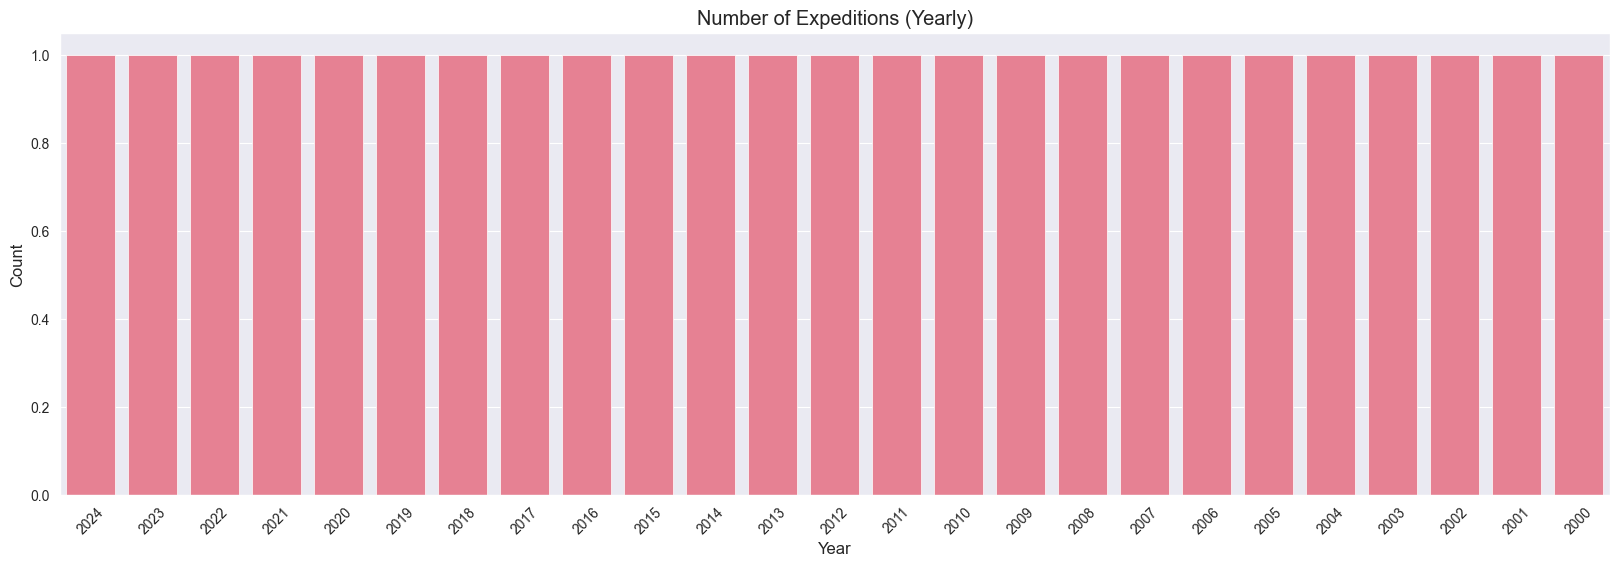

In [17]:

data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'year': [
        2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024
    ],
    'peak_id': range(25)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

year_exped_trend = df\
    .query("peak_name in @top_25_mountains")\
    .groupby('year', as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

# Plot without the function
plt.figure(figsize=(20, 6))
sns.barplot(x=year_exped_trend['year'],
            y=year_exped_trend['ascents'],
            order=year_exped_trend['year'].sort_values(ascending=False))

plt.xticks(rotation=45)
plt.title('Number of Expeditions (Yearly)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


We see that starting from 1978 number of expeditions started increasing. Besides, we see some drops:
- 2015: Earthquake reason
- 2020: Coronavirus reason

### Popular Season to Climb
Some Himalayan mountains can be climbed only at a particular time of the year. Usually, it's spring and autumn. For example, Everest is usually climbed in Spring due to good weather conditions and low wind speed. 

Many climbers wait for so-called weather window (i.e. period of time - several days or a week when the wind is slow and weather is good)

It's crucial information and sometimes the success of an expedition fully depends on the date of the weather window 

In [19]:

data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'season': [
        'Spring', 'Summer', 'Autumn', 'Winter', 'Spring',
        'Summer', 'Autumn', 'Winter', 'Spring', 'Summer',
        'Autumn', 'Winter', 'Spring', 'Summer', 'Autumn',
        'Winter', 'Spring', 'Summer', 'Autumn', 'Winter',
        'Spring', 'Summer', 'Autumn', 'Winter', 'Spring'
    ],
    'peak_id': range(25)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

pop_season = df\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'season'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

fig = px.bar(pop_season,
             x='peak_name',
             y='ascents',
             color='season',
             title='Popular Season to Climb',
             labels={'peak_name': 'Peak Name', 'ascents': 'Total Ascents'},
             color_discrete_sequence=px.colors.qualitative.Pastel) 

fig.show()


The data confirms my experience, many expeditions pick either Autumn or Spring to climb 

### Weather Window 
Now let's find out most often date of the weather window

In [22]:

data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'summit_day': [
        '2023-05-20', '2023-06-15', '2023-04-10', '2023-05-25', '2023-05-30',
        '2023-05-05', '2023-06-10', '2023-04-15', '2023-05-20', '2023-06-25',
        '2023-07-15', '2023-08-01', '2023-07-05', '2023-09-10', '2023-09-20',
        '2023-10-10', '2023-05-15', '2023-05-22', '2023-05-12', '2023-06-15',
        '2023-05-10', '2023-05-22', '2023-05-15', '2023-06-12', '2023-06-20'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

window_dates = []

for peak in top_25_mountains:
    peak_data = df.query("peak_name == @peak")['summit_day'].dropna()
    peak_data = pd.to_datetime('2020-' + peak_data.str.slice(5))  # Convert to common year
    date_int_64 = peak_data.values.astype(np.int64)
    median_date = pd.to_datetime(np.median(date_int_64))
    median_date_str = f"{median_date.day} {median_date.month_name()}"
    window_dates.append({'peak_name': peak, 'weather_window_date': median_date_str})

window_dates_df = pd.DataFrame(window_dates)

window_dates_df.head()


,peak_name,weather_window_date
0,Everest,16 May
1,Lhotse,3 June
2,K2,15 June
3,Gasherbrum I,15 July
4,Annapurna III,15 May


The data tells us that Everest is usually summited in the end of May, and it's actually true

We know date, but what about time?

### Summit Time 
Let's find out the median summit time for the peaks 

In [24]:

data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'time': [
        '06:30', '07:45', '08:00', '09:15', '10:30',
        '11:45', '12:00', '13:15', '14:30', '15:45',
        '16:00', '17:15', '18:30', '19:45', '20:00',
        '21:15', '22:30', '23:45', '24:00', '25:15',
        '26:30', '27:45', '28:00', '61:5', '30:30'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

def find_wrong_time_indx(series):
    return [indx for indx, value in series.items() if pd.to_datetime(value, errors='coerce') is pd.NaT]

median_time = []

for peak in top_25_mountains:
    peak_data = df.query("peak_name == @peak")['time'].dropna()
    wrong_time_indxs = find_wrong_time_indx(peak_data)
    peak_data = peak_data[~peak_data.index.isin(wrong_time_indxs)]
    
    peak_data = pd.to_datetime(peak_data, format='%H:%M', errors='coerce').dropna()
    if not peak_data.empty:
        date_int_64 = peak_data.values.astype(np.int64)
        median_res = pd.to_datetime(np.median(date_int_64)).time()
        median_time.append({'peak_name': peak, 'summit_time': median_res})

median_time_df = pd.DataFrame(median_time)

median_time_df['summit_time_int'] = median_time_df['summit_time'].apply(lambda x: int(x.strftime('%H%M%S')))
median_time_df.sort_values(by='summit_time', inplace=True)

print(median_time_df.head())


        peak_name summit_time  summit_time_int
0         Everest    06:30:00            63000
2              K2    07:45:00            74500
16  Kangchenjunga    08:00:00            80000
1          Lhotse    09:15:00            91500
15         Makalu    10:30:00           103000


To plot the time values on a bar plot, we have converted time into int values

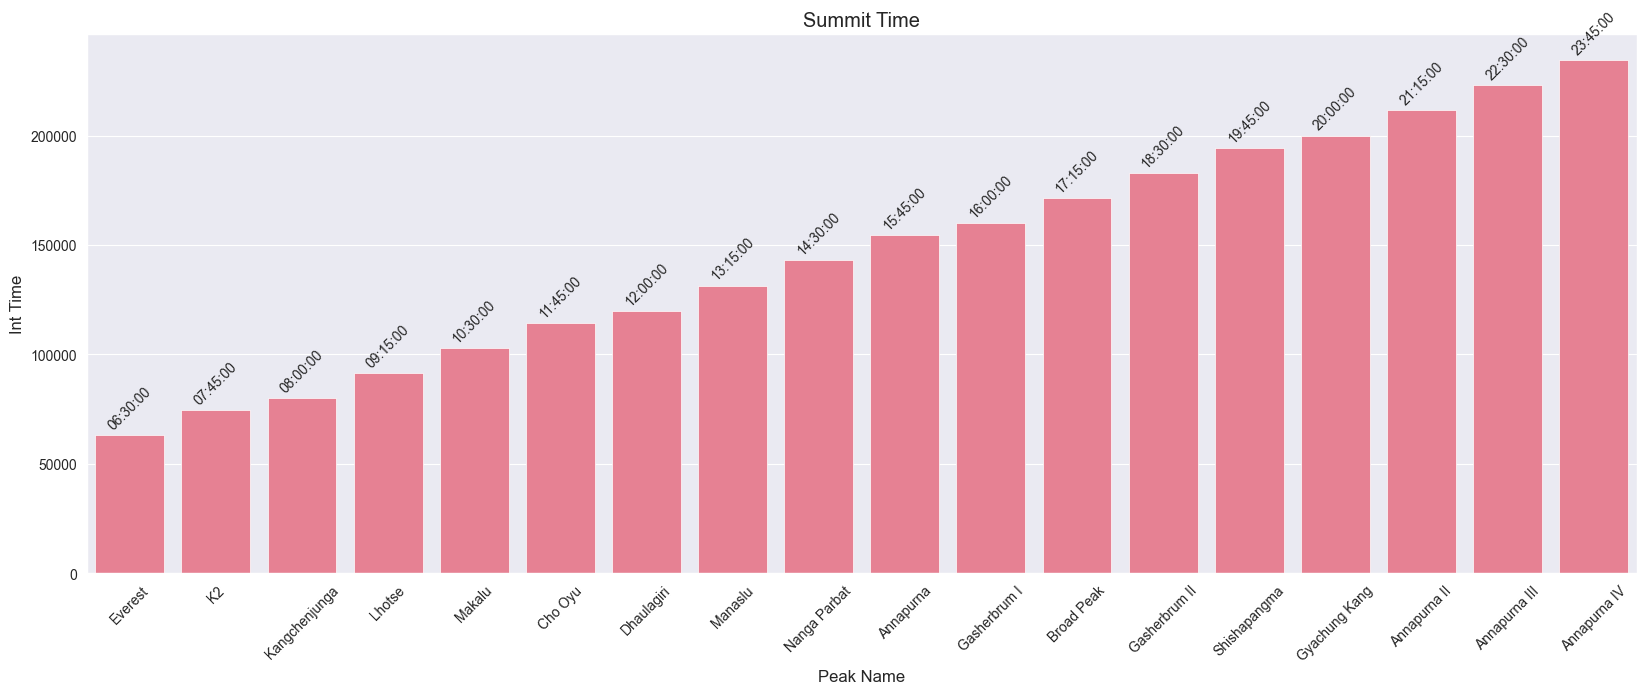

In [27]:


# Assuming `median_time_df` is the DataFrame with the results

plt.figure(figsize=(20, 7))
ax = sns.barplot(x=median_time_df['peak_name'], y=median_time_df['summit_time_int'])

# Adding bar labels
for container in ax.containers:
    labels = [f"{time}" for time in median_time_df['summit_time']]
    ax.bar_label(container, labels=labels, rotation=45, padding=2)

plt.xticks(rotation=45)
plt.title('Summit Time')
plt.xlabel('Peak Name')
plt.ylabel('Int Time')
plt.show()


We can observe that the peaks are summited in the morning or not later than 3 PM

### Days to Summit 
Let's try to answer how many days we have to spend to summit a Himalayan peak

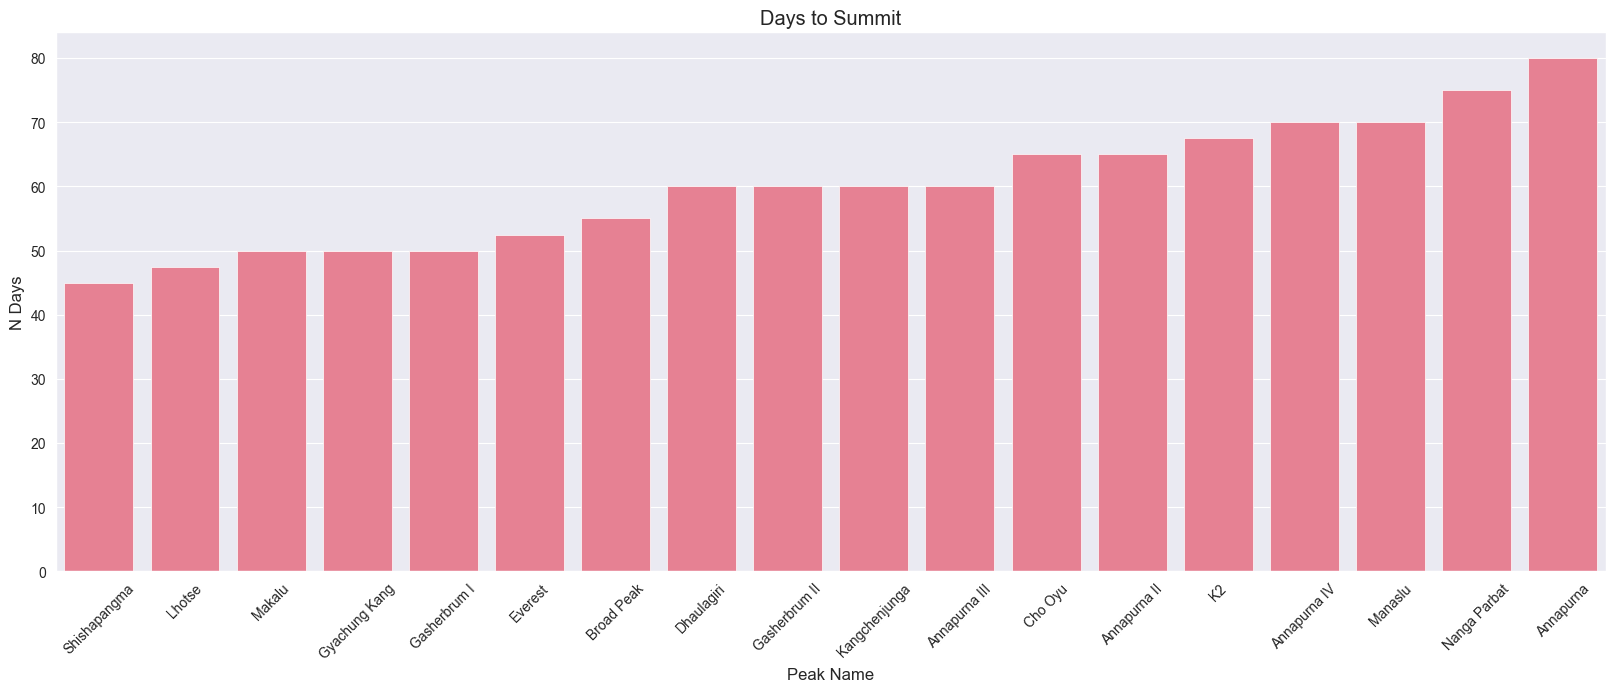

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang',
        'Annapurna II', 'Annapurna III', 'Annapurna IV', 'Everest', 'K2',
        'Everest', 'Everest', 'Lhotse', 'Lhotse', 'Lhotse'
    ],
    'total_days': [
        50, 55, 60, 45, 50,
        65, 60, 70, 75, 80,
        50, 55, 60, 45, 50,
        65, 60, 70, 75, 80,
        50, 55, 60, 0, 50
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

median_days_to_summit = df\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'total_days': 'median'}).rename(columns={'total_days': 'median_days'})\
    .query("median_days != 0")\
    .sort_values('median_days')

# Plotting function
def plot_bar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(20, 7))
    ax = sns.barplot(x=x, y=y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Plot the bar chart
plot_bar(x=median_days_to_summit['peak_name'],
         y=median_days_to_summit['median_days'],
         title='Days to Summit',
         xlabel='Peak Name',
         ylabel='N Days')


The higher the mountain, the more days you have to spend on the expedition (not surprisingly)

### Popular Host Country
The peaks can be climbed from particular countries. Let's find out the most popular ones

In [37]:
import pandas as pd
import plotly.express as px

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang'
    ],
    'host_cntr': [
        'Nepal', 'Pakistan', 'India', 'Nepal', 'Nepal',
        'Tibet', 'Nepal', 'Nepal', 'Pakistan', 'Nepal',
        'Pakistan', 'Pakistan', 'Pakistan', 'China', 'Nepal'
    ],
    'peak_id': range(15)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

pop_host_cnt = df\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'host_cntr'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

# Plotting
fig = px.bar(pop_host_cnt,
             x='peak_name',
             y='ascents',
             color='host_cntr',
             title='The Most Popular Host Countries',
             labels={'peak_name': 'Peak Name', 'ascents': 'Total Ascents'},
             color_discrete_sequence=px.colors.qualitative.Plotly)  # Use discrete colors for categories

fig.show()


The most popular host country for Everest - Nepal whereas for Cho Oyu - China. If I had an opportunity to climb Everest, I would choose China. The route there is safer (you don't have to cross Khumbu Icefall

### Top 3 Popular Routes 
Now let's find out the most popular routes

In [38]:
import pandas as pd
import plotly.express as px

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang'
    ],
    'rte_1_name': [
        'South Col', 'K2 Base Camp', 'Yalung Kang', 'Lhotse Face', 'Makalu Route',
        'North Ridge', 'Normal Route', 'Manaslu Route', 'Mummery Route', 'South Route',
        'K2 Abruzzi', 'North Face', 'West Face', 'South Face', 'North Face'
    ],
    'peak_id': range(15)  # Just an example column for counting
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

tmp_df = df\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'rte_1_name'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

top_route = pd.DataFrame()
for peak in top_25_mountains:
    top_routes = tmp_df.query('peak_name == @peak').sort_values('ascents', ascending=False)[:3]
    top_route = pd.concat([top_route, top_routes], ignore_index=True)

# Plotting
fig = px.bar(top_route,
             x='peak_name',
             y='ascents',
             title='Top 3 Popular Routes',
             labels={'peak_name': 'Peak Name', 'ascents': 'Total Ascents'},
             color='rte_1_name',
             color_discrete_sequence=px.colors.qualitative.Plotly)  # Use discrete colors for categories

fig.show()


Route `S Col-SE Ridge` is a standard for Everest and the most popular one. However, you have to cross Khumbu Icefall. The icefall is unstable and many problems are highly probable there (e.g. seracs falling, avalanches, alpinists falling etc.)

Route `N Col-NE Ridge` is another alternative that is safer. That's why we see theses two main routes for Everest

### Average Expedition Size 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
data = {
    'peak_name': [
        'Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu',
        'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna',
        'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma', 'Gyachung Kang'
    ],
    'total_mbrs': [
        10, 15, 12, 8, 20,
        18, 12, 16, 14, 22,
        19, 17, 15, 11, 13,
        21, 20, 14, 16, 18
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Intermediate Data
top_25_mountains = df['peak_name'].value_counts().index[:25].tolist()

# Calculate average expedition size
avg_exped_size = df\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'total_mbrs': 'mean'}).rename(columns={'total_mbrs': 'avg_exped_size'})

avg_exped_size['avg_exped_size'] = avg_exped_size['avg_exped_size'].round()
avg_exped_size = avg_exped_size.sort_values('avg_exped_size', ascending=False)

# Plotting function
def plot_bar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(20, 7))
    ax = sns.barplot(x=x, y=y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Plot the bar chart
plot_bar(x=avg_exped_size['peak_name'],
         y=avg_exped_size['avg_exped_size'],
         title='Average Expedition Size',
         xlabel='Peak Name',
         ylabel='Expedition Size')


ValueError: All arrays must be of the same length

### Avg Summiters Fraction of the Expedition
Let's find out what portion/fraction of an expedition summits in comparison to complete expedition size

In [33]:
### Avg Summiters size in the expedition 
data['mbrs_summiters_frac'] = data['mbrs_summited']/data['total_mbrs']

sum_frac = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'mbrs_summiters_frac': 'mean'}).rename(columns={'mbrs_summiters_frac': 'mbrs_summiters_frac'})\
    .sort_values('mbrs_summiters_frac', ascending=False)

plot_bar(x=sum_frac['peak_name'],
         y=sum_frac['mbrs_summiters_frac'],
         title='Average Summiters Fraction',
         xlabel='Peak Name',
         ylabel='Fraction')

KeyError: 'mbrs_summited'

For example, less than 40% of a team summits Everest

### O2 vs no O2 summits
Some of these mountains are higher than 8k meters and alpinists have to climb above a zone that is called death zone. That's why some expeditions use oxygen because it increases chances to summit. Let's look at the data and compare the number of "oxygen" and "not_oxygen" expeditions 

In [34]:
o2_data = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'is_o2_used': 'sum'})\
    .sort_values('is_o2_used', ascending=False)


no_o2_data = data\
    .query("peak_name in @top_25_mountains and is_o2_used == 0")\
    .groupby('peak_name', as_index=False)\
    .agg({'is_o2_used': 'count'})\
    .sort_values('is_o2_used', ascending=False)\
    .rename(columns={'is_o2_used': 'is_o2_not_used'})

o2_data = pd.merge(o2_data, no_o2_data, how='inner', on='peak_name')

fig = px.bar(o2_data,
             x='peak_name',
             y=['is_o2_not_used', 'is_o2_used'],
             title='Number of Expeditions with/without Oxygen',
             labels = {'peak_name': 'Peak Name', 'value': 'Total Ascents'},
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

AttributeError: 'dict' object has no attribute 'query'

Mountains that are higher 8k usually climbed with supplemental oxygen. Especially Everest, alpinists tend to summit with oxygen

### Expedition Fraction to Die 
Let's calculate what is the average expedition fraction that will probably die on a mountain. 

We have another dataset (e.g. `deaths.csv`) but for now we will use deaths statistics from `expeditions.csv`

In [35]:
# Portion of team to die 
data['mbrs_die_frac'] = data['mbrs_deaths']/data['total_mbrs']

deaths_frac = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'mbrs_die_frac': 'mean'})\
    .sort_values('mbrs_die_frac', ascending=False)

plot_bar(x=deaths_frac['peak_name'],
         y=deaths_frac['mbrs_die_frac'],
         title='Expedition Fraction to Die',
         xlabel='Peak Name',
         ylabel='Fraction')

KeyError: 'mbrs_deaths'

Not surprisingly, we have Annapurna I, Nuptse and other peaks. I'd say that these peaks are difficult to climb, mostly climbers have to face with bad weather, avalanches and route difficulties.

All these factors increase chances of an accident and climbers deaths 

In [36]:
# Download another dataset
deaths_df = pd.read_csv('../input/himalayan-expeditions/deaths.csv')
deaths_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/himalayan-expeditions/deaths.csv'

### Total Deaths on Peaks 
Let's sort the peaks by deaths

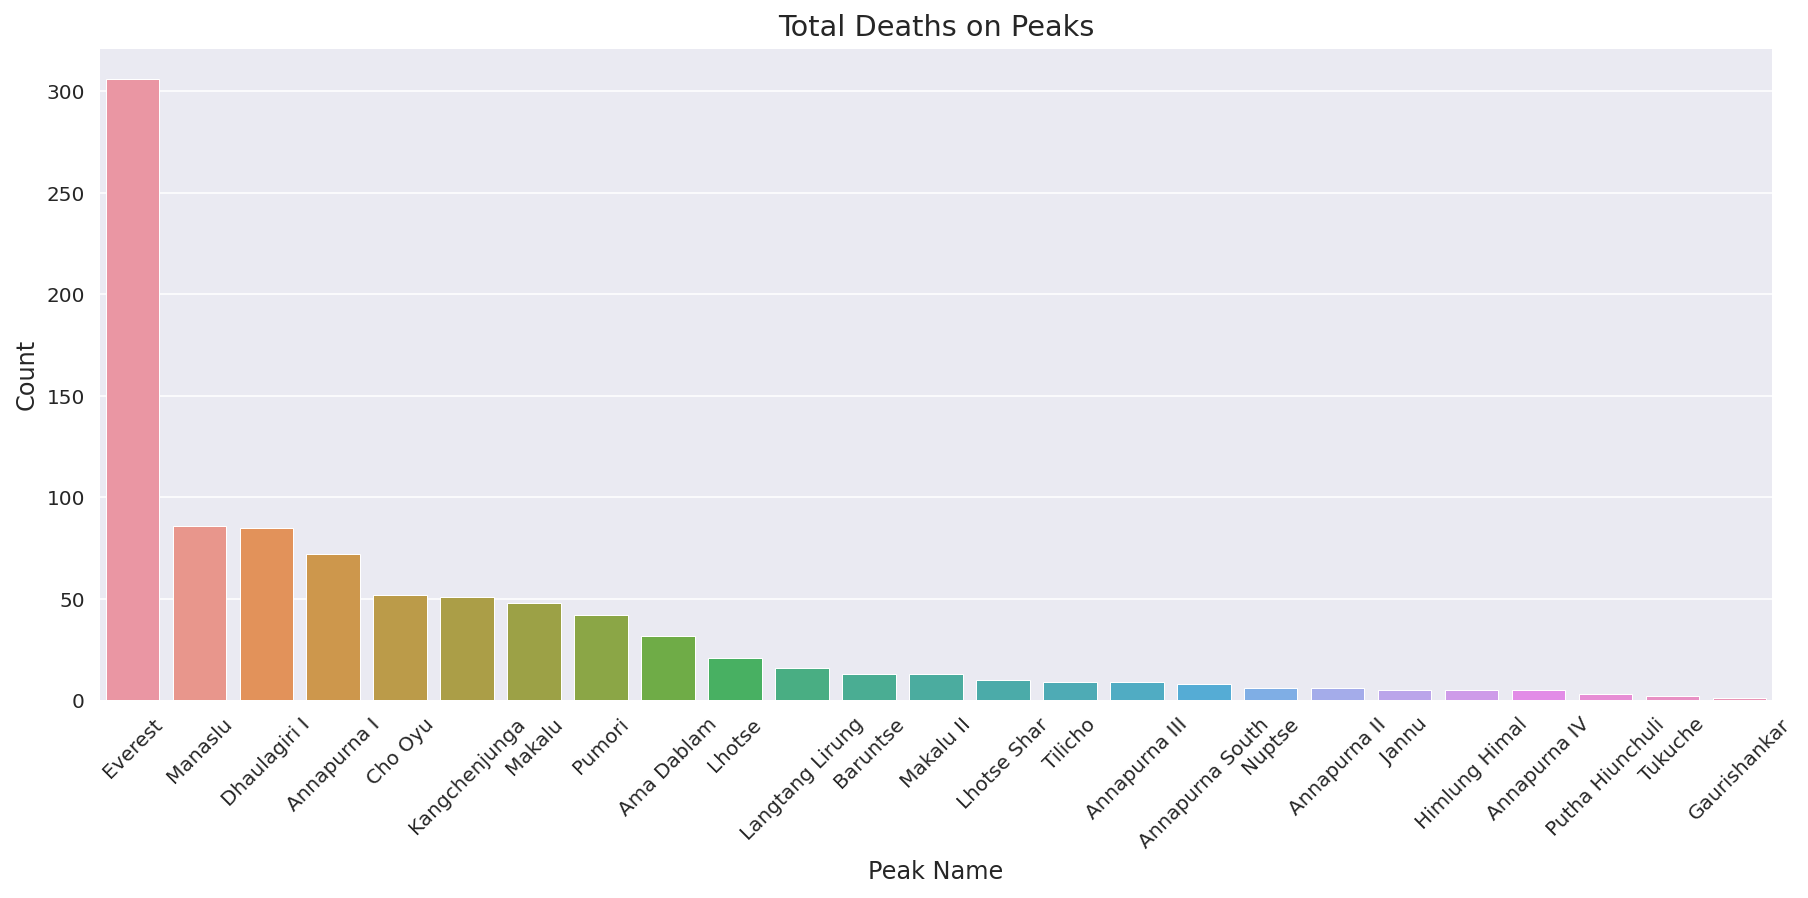

In [ ]:
peak_deaths = deaths_df\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'peak_id': 'count'})\
    .rename(columns={'peak_id': 'n_deaths'})\
    .sort_values('n_deaths', ascending=False)
    
plot_bar(x=peak_deaths['peak_name'],
         y=peak_deaths['n_deaths'],
         title='Total Deaths on Peaks',
         xlabel='Peak Name',
         ylabel='Count')

I must say that you don't have to trust these values mindlessly. Although Everest, Manasly and Dhaulagiri I have the largest number of deaths, they are not so dangerous as other peaks. This is due to popularity of these peaks (i.e. they are not so technically difficult, popular (especially Everest) and 8k mountains). All these fascinates unexperienced climbers to pick these mountains. 

That's why we have so bad death statistics

In [ ]:
deaths_df['death_reason'] = deaths_df['cause_of_death'].apply(lambda x: x.split(' ')[0])

tmp_df = deaths_df\
            .query("peak_name in @top_25_mountains")\
            .groupby(['peak_name', 'death_reason'], as_index=False)\
            .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'count'})

top_death_reasons = pd.DataFrame()
for peak in top_25_mountains:
    top_death_reasons = top_death_reasons.append(
        tmp_df.query('peak_name == @peak').sort_values('count', ascending=False)[:3]
    )
    
fig = px.bar(top_death_reasons,
             x='peak_name',
             y='count',
             title='Top 3 Death Reasons',
             labels = {'peak_name': 'Peak Name'},
             color='death_reason',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

We can see that the main danger:
- Avalanche
- Fall 
- AMS (Altitude Mountain Sickness)

Who want to avoid troubles and a possibility to die must carefully take these factors into account before climbing 

### Top 3 Countries (Deaths)
Let's find out what are the main countries that usually have troubles on the peaks

In [ ]:
tmp_df = deaths_df\
            .query("peak_name in @top_25_mountains")\
            .groupby(['peak_name', 'citizenship'], as_index=False)\
            .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'count'})

top_death_countries = pd.DataFrame()
for peak in top_25_mountains:
    top_death_countries = top_death_countries.append(
        tmp_df.query('peak_name == @peak').sort_values('count', ascending=False)[:3]
    )
    
fig = px.bar(top_death_countries,
             x='peak_name',
             y='count',
             title='Top 3 Countires (Deaths)',
             color='citizenship',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

We can see that Nepal is top 1. This is due to Sherpas that assist, help and do the main job on the peaks. 

Honestly, other climbers just hire them to carry oxygen, assist when climbing, cooking, make camps and for other reasons.

Indians and Japanese tend to have more troubles on the peaks

### Conclusion
That's probably it for now. You can answer even more interesting questions than mine...all you need is desire))

Big thanks for reading!